<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/TCP_UDPConnections/appWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt  
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trx_Rcd_Analysis/controlled_data_os8.csv')
df

,APP,VERSION,FEATURE_NAME,LATENCY,RX_BYTES (MB),TX_BYTES (MB),RX_BYTES_OLD (MB),TX_BYTES_OLD (MB),#TCP_CONNECTIONS,#UDP_CONNECTIONS,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK
0,dailyhunt,v3,opening news page,3000,0.039100,0.007330,0.253564,0.207078,2,0,9.57,NaN,NaN
1,flipkart,v3,search product result,222,0.145883,0.049829,0.299076,0.102057,0,0,9.95,NaN,NaN
2,flipkart,v3,product profile,5754,0.032837,0.013976,0.299076,0.102057,0,0,9.95,NaN,NaN
3,flipkart,v3,add to cart,5405,0.043594,0.014566,0.299076,0.102057,0,0,9.95,NaN,NaN
4,flipkart,v3,go to cart,5405,0.072447,0.020477,0.299076,0.102057,0,0,9.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,youtube,v3,search video page,1581,0.316850,0.083309,0.826316,0.142277,0,0,11.60,NaN,NaN
590,youtube,v3,play video page,3068,0.825841,0.141516,0.826316,0.142277,0,0,11.60,NaN,NaN
591,facebook,v3,post in a group,209,0.406285,0.088443,0.424650,0.095709,4,1,11.10,NaN,NaN
592,facebook,v3,search results page,5297,0.176759,0.216784,0.348278,0.247159,5,1,11.10,NaN,NaN


In [ ]:
df[['FEATURE_NAME', 'RX_BYTES (MB)', 'TX_BYTES (MB)']]

,FEATURE_NAME,RX_BYTES (MB),TX_BYTES (MB)
0,opening news page,0.039100,0.007330
1,search product result,0.145883,0.049829
2,product profile,0.032837,0.013976
3,add to cart,0.043594,0.014566
4,go to cart,0.072447,0.020477
...,...,...,...
589,search video page,0.316850,0.083309
590,play video page,0.825841,0.141516
591,post in a group,0.406285,0.088443
592,search results page,0.176759,0.216784


In [ ]:
group_rx = df.groupby(['APP','FEATURE_NAME']).apply(lambda x: x['RX_BYTES (MB)'].unique())
group_rx

APP         FEATURE_NAME         
dailyhunt   opening news page        [0.039099693, 0.019628525, 0.02086830100000000...
facebook    person profile page      [0.174577713, 0.131116867, 0.12282943699999999...
            post in a group          [0.156640053, 0.19614791899999998, 0.160456657...
            search results page      [0.190514565, 0.228870392, 0.244350433, 0.2907...
flipkart    add to cart              [0.04359436, 0.026509285, 0.025848389, 0.00953...
            go to cart               [0.072446823, 0.013949393999999999, 0.01733684...
            product profile          [0.032836914, 0.029219627, 0.02920723, 0.03234...
            remove from cart         [0.004315376, 0.004303932, 0.004524231, 0.0033...
            search product result    [0.145882607, 0.161240578, 0.12262821199999999...
googlemaps  search place             [0.11231327099999999, 0.292602539, 0.116555214...
googlenews  search news              [0.395091057, 0.2501297, 0.227520943, 0.397318...
hotstar  

In [ ]:
group_tx = df.groupby(['APP','FEATURE_NAME']).apply(lambda x: x['TX_BYTES (MB)'].unique())
group_tx

APP         FEATURE_NAME         
dailyhunt   opening news page        [0.0073299409999999995, 0.18255138399999998, 0...
facebook    person profile page      [0.026499747999999997, 0.025075912000000002, 0...
            post in a group          [0.07032299, 0.07588958700000001, 0.0735177990...
            search results page      [0.23885059399999997, 0.268209457, 0.25609684,...
flipkart    add to cart              [0.014566421999999999, 0.012955666000000001, 0...
            go to cart               [0.020477295, 0.007452965, 0.007658958, 0.0135...
            product profile          [0.013976097, 0.013279915, 0.01331710800000000...
            remove from cart         [0.002661705, 0.002612114, 0.004457474, 0.0026...
            search product result    [0.049829483, 0.05209446, 0.044825554000000004...
googlemaps  search place             [0.035476685, 0.058922768, 0.052101135, 0.0311...
googlenews  search news              [0.062422752000000005, 0.064285278, 0.04312801...
hotstar  

In [ ]:
df_rx = group_rx.apply(pd.Series)
df_rx.reset_index(inplace=True)
# df[['APP', 'ACTION']] = df['FEATURE_NAME'].str.split('_', expand=True)
df_rx[['APP', 'FEATURE_NAME']]

,APP,FEATURE_NAME
0,dailyhunt,opening news page
1,facebook,person profile page
2,facebook,post in a group
3,facebook,search results page
4,flipkart,add to cart
5,flipkart,go to cart
6,flipkart,product profile
7,flipkart,remove from cart
8,flipkart,search product result
9,googlemaps,search place


In [ ]:
df_tx = group_tx.apply(pd.Series)
df_tx.reset_index(inplace=True)
# df[['APP', 'ACTION']] = df['FEATURE_NAME'].str.split('_', expand=True)
df_tx[['APP', 'FEATURE_NAME']]

,APP,FEATURE_NAME
0,dailyhunt,opening news page
1,facebook,person profile page
2,facebook,post in a group
3,facebook,search results page
4,flipkart,add to cart
5,flipkart,go to cart
6,flipkart,product profile
7,flipkart,remove from cart
8,flipkart,search product result
9,googlemaps,search place


In [ ]:
m

In [ ]:
df_rx = df_rx.fillna(0)
filtered_data = [0] * len(df_rx)
xlabels = [0] * len(df_rx)
print(df_rx)
for rownum in range(len(df_rx)):
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    # print(values)
    print("Median Value: ", np.median(values))
    filtered_data[rownum] = values
    # xlabels[rownum] = df.iloc[rownum, -1]
    # xlabels[rownum]
print(filtered_data)

           APP           FEATURE_NAME         0  ...        27        28        29
0    dailyhunt      opening news page  0.039100  ...  0.019403  0.021675  0.000000
1     facebook    person profile page  0.174578  ...  0.213417  0.156374  0.000000
2     facebook        post in a group  0.156640  ...  0.690506  0.406285  0.000000
3     facebook    search results page  0.190515  ...  0.203808  0.176759  0.000000
4     flipkart            add to cart  0.043594  ...  0.000000  0.000000  0.000000
5     flipkart             go to cart  0.072447  ...  0.000000  0.000000  0.000000
6     flipkart        product profile  0.032837  ...  0.000000  0.000000  0.000000
7     flipkart       remove from cart  0.004315  ...  0.000000  0.000000  0.000000
8     flipkart  search product result  0.145883  ...  0.000000  0.000000  0.000000
9   googlemaps           search place  0.112313  ...  0.114207  0.116064  0.000000
10  googlenews            search news  0.395091  ...  0.000000  0.000000  0.000000
11  

In [ ]:
df_tx = df_tx.fillna(0)
filtered_data_tx = [0] * len(df_tx)
xlabels = [0] * len(df_tx)
print(df_tx)
for rownum in range(len(df_tx)):
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    # print(values)
    print("Median Value: ", np.median(values))
    filtered_data_tx[rownum] = values
    # xlabels[rownum] = df.iloc[rownum, -1]
    # xlabels[rownum]
print(filtered_data_tx)

           APP           FEATURE_NAME         0  ...        27        28        29
0    dailyhunt      opening news page  0.007330  ...  0.196080  0.236928  0.000000
1     facebook    person profile page  0.026500  ...  0.022615  0.022972  0.000000
2     facebook        post in a group  0.070323  ...  0.173176  0.088443  0.000000
3     facebook    search results page  0.238851  ...  0.256036  0.216784  0.000000
4     flipkart            add to cart  0.014566  ...  0.000000  0.000000  0.000000
5     flipkart             go to cart  0.020477  ...  0.000000  0.000000  0.000000
6     flipkart        product profile  0.013976  ...  0.000000  0.000000  0.000000
7     flipkart       remove from cart  0.002662  ...  0.000000  0.000000  0.000000
8     flipkart  search product result  0.049829  ...  0.000000  0.000000  0.000000
9   googlemaps           search place  0.035477  ...  0.037118  0.032599  0.000000
10  googlenews            search news  0.062423  ...  0.000000  0.000000  0.000000
11  

0.021164894 ['Search News']


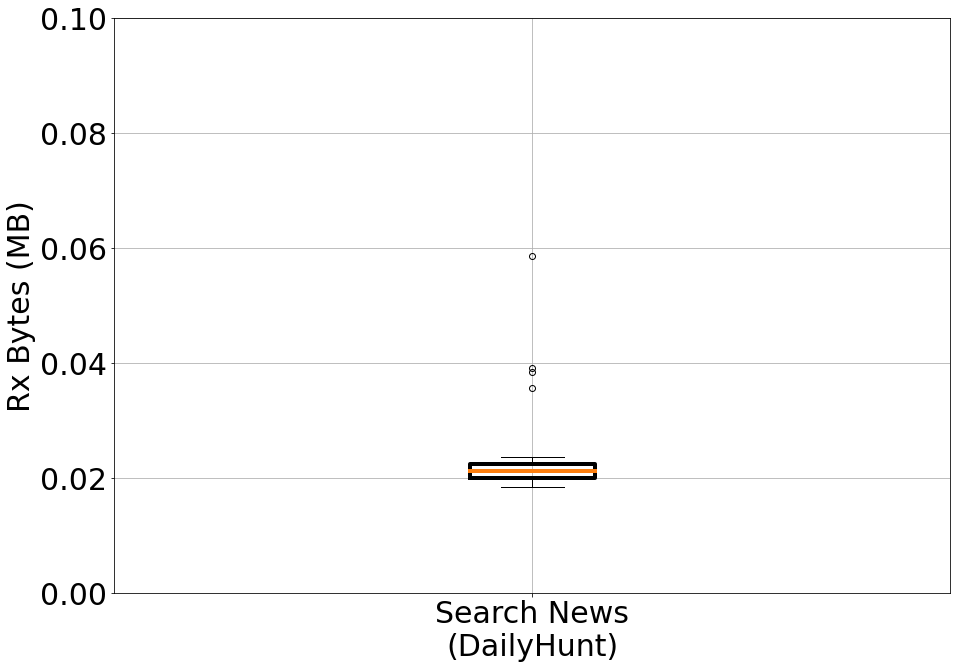

In [ ]:
xlabels=['Search News']
plt.boxplot(filtered_data[0], labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.grid()
plt.xlabel('(DailyHunt)')
plt.ylabel('Rx Bytes (MB)')
plt.ylim([0, 0.1])

print(np.median(filtered_data[0]), xlabels)
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'dailyhunt_searchNews_RX.pdf', bbox_inches='tight')
plt.show()


0.22135353100000002 ['Search News']


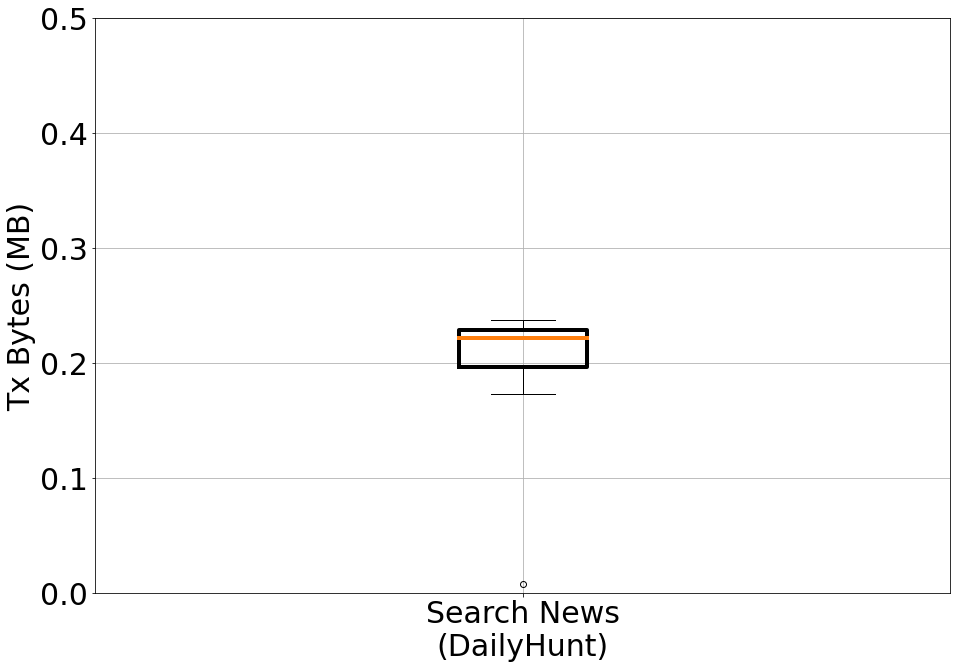

In [ ]:
xlabels=['Search News']
plt.boxplot(filtered_data_tx[0], labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.grid()
plt.xlabel('(DailyHunt)')
plt.ylabel('Tx Bytes (MB)')
plt.ylim([0, 0.5])

print(np.median(filtered_data_tx[0]), xlabels)
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'dailyhunt_searchNews_TX.pdf', bbox_inches='tight')
plt.show()

[4 5 6 7 8]
Median Value:  0.011844635
Median Value:  0.010574341000000001
Median Value:  0.033167839
Median Value:  0.004519463
Median Value:  0.13891029400000002


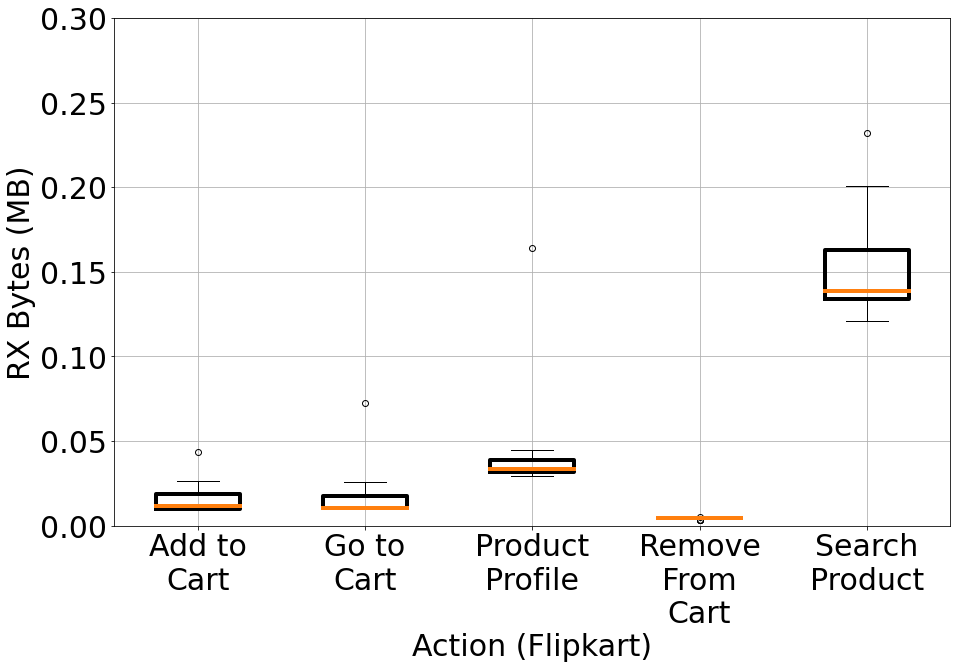

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'flipkart'].index.values
print(rowvalues)
filtered_data = [0] * 5
xlabels = [0] * 5
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Add to\nCart', 'Go to\nCart', 'Product\nProfile', 'Remove\nFrom\nCart', 'Search\nProduct']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Flipkart)')
plt.ylabel('RX Bytes (MB)')
plt.ylim([0, 0.3])

#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'flipkart_RX.pdf', bbox_inches='tight')


[4 5 6 7 8]
Median Value:  0.007978439
Median Value:  0.008500099
Median Value:  0.014587402
Median Value:  0.002908707
Median Value:  0.050081253


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


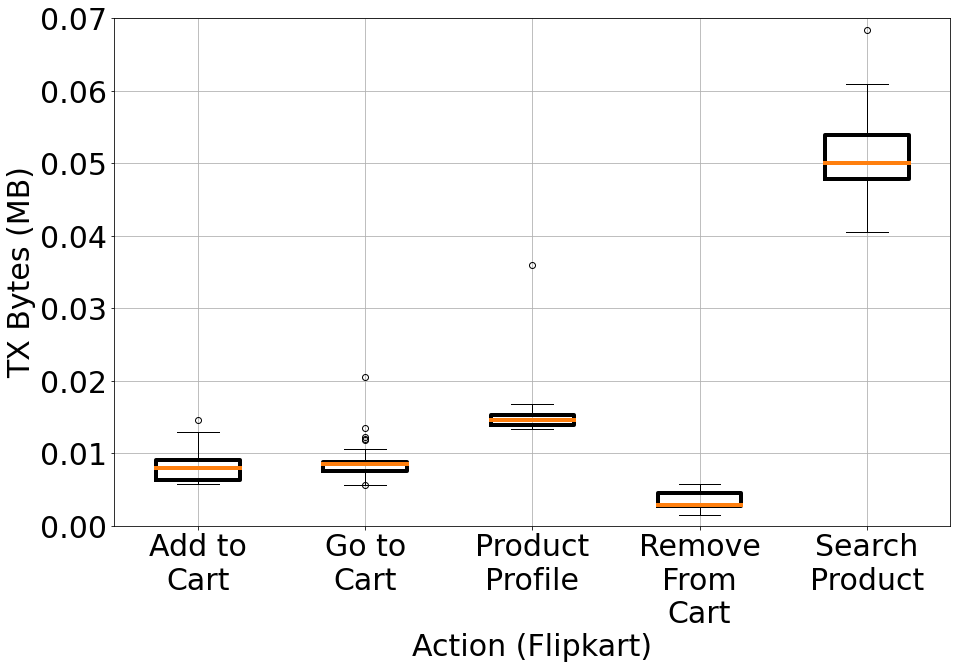

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'flipkart'].index.values
print(rowvalues)
filtered_data_tx = [0] * 5
xlabels = [0] * 5
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data_tx[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Add to\nCart', 'Go to\nCart', 'Product\nProfile', 'Remove\nFrom\nCart', 'Search\nProduct']
plt.grid()
plt.boxplot(filtered_data_tx, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Flipkart)')
plt.ylabel('TX Bytes (MB)')
plt.ylim([0, 0.07])

#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'flipkart_TX.pdf', bbox_inches='tight')


Median Value:  0.8248620035
Median Value:  0.395317078
Median Value:  0.311348438
0.8248620035 ['Play\nVideo', 'Search\nChannel', 'Search\nVideo']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


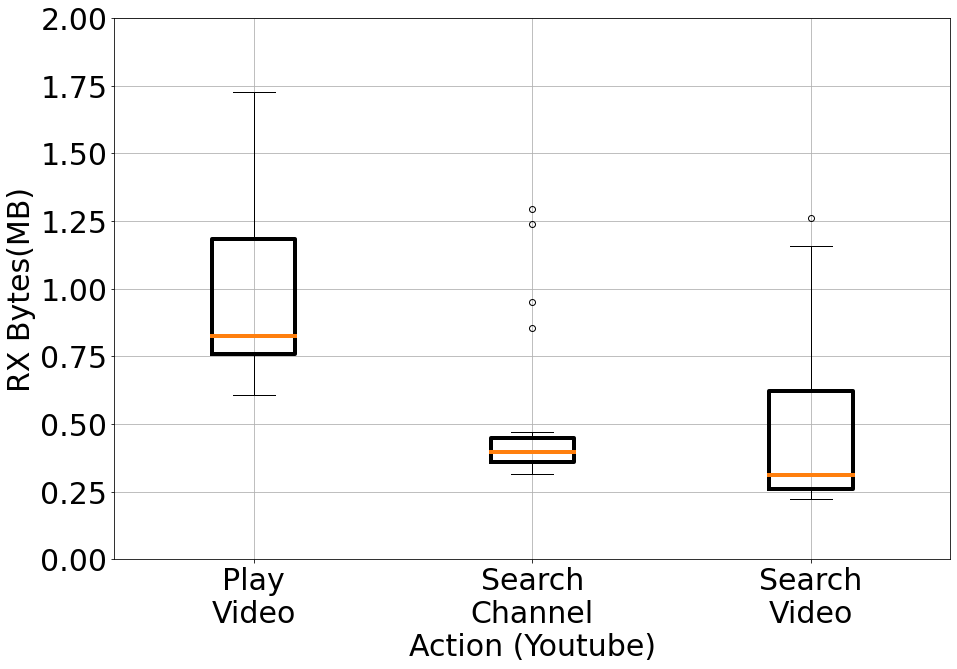

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'youtube'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Play\nVideo', 'Search\nChannel', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Youtube)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 2])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'youtube_RX.pdf', bbox_inches='tight')

Median Value:  0.13489961649999999
Median Value:  0.08460140199999999
Median Value:  0.08034849150000001
0.13489961649999999 ['Play\nVideo', 'Search\nChannel', 'Search\nVideo']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


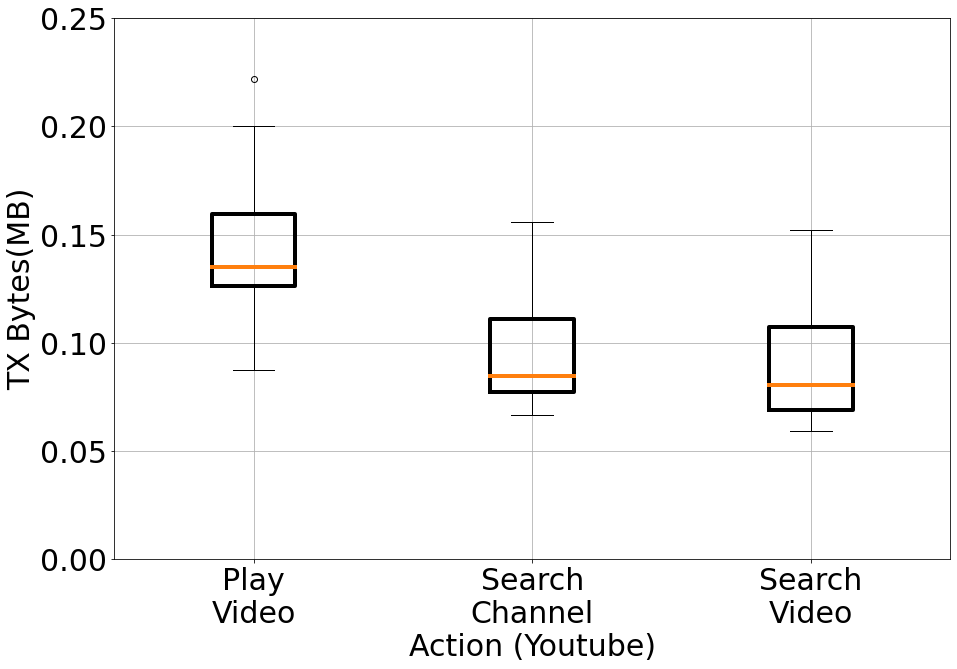

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'youtube'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Play\nVideo', 'Search\nChannel', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Youtube)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.25])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'youtube_TX.pdf', bbox_inches='tight')

Median Value:  0.13539838799999998
Median Value:  0.1812524795
Median Value:  0.167403221
0.13539838799999998 ['Person\nProfile', 'Post in\nGroup', 'Search\nResults']


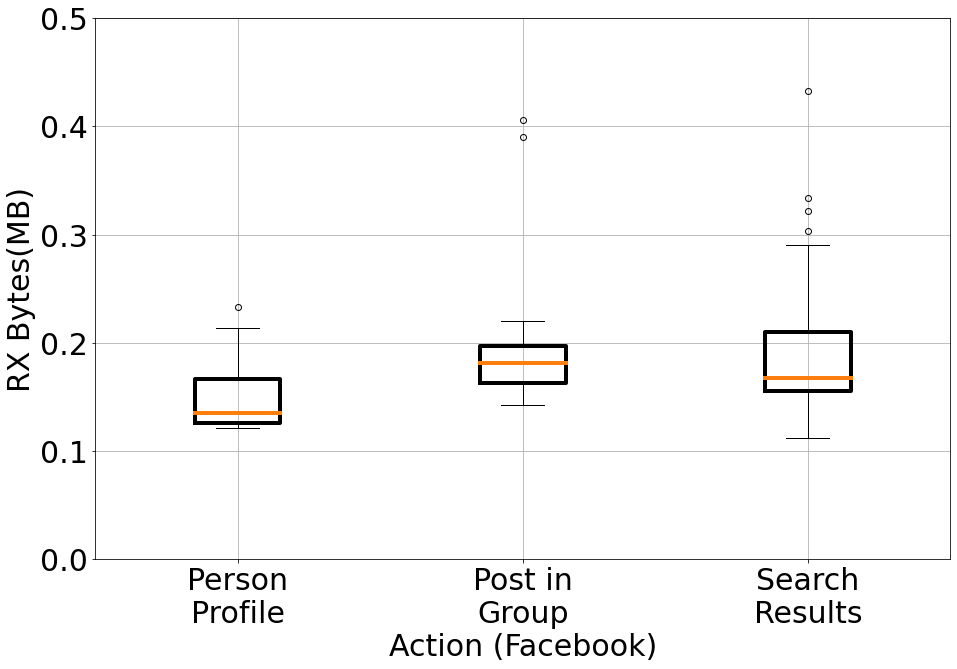

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'facebook'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Person\nProfile', 'Post in\nGroup', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Facebook)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 0.5])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'facebook_RX.pdf', bbox_inches='tight')

Median Value:  0.023392677
Median Value:  0.075852394
Median Value:  0.238939285
0.023392677 ['Person\nProfile', 'Post in\nGroup', 'Search\nResults']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


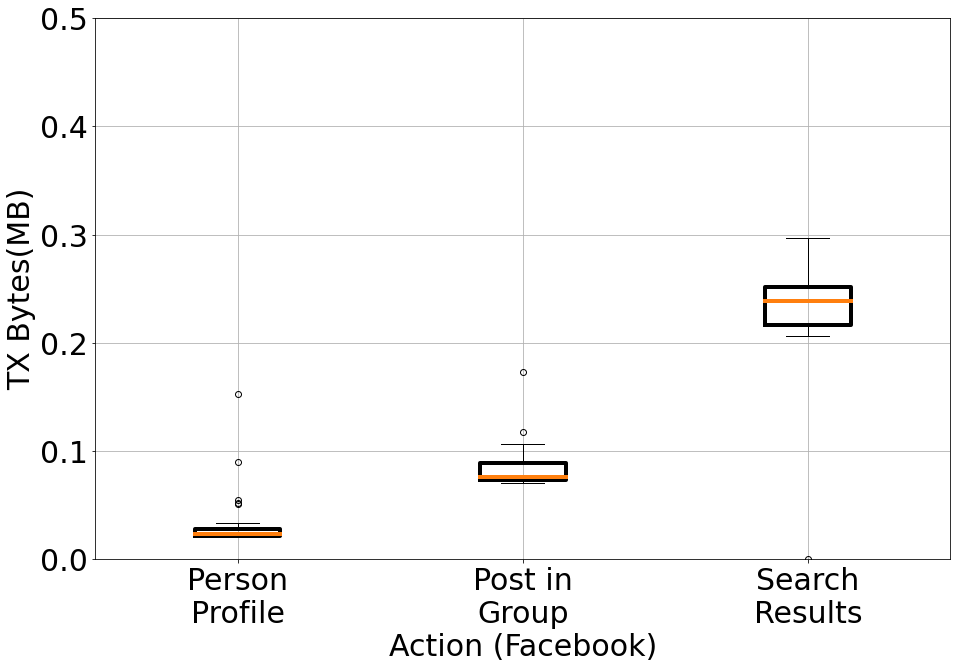

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'facebook'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Person\nProfile', 'Post in\nGroup', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Facebook)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.5])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'facebook_TX.pdf', bbox_inches='tight')

Median Value:  0.111281395
0.111281395 ['Search Place']


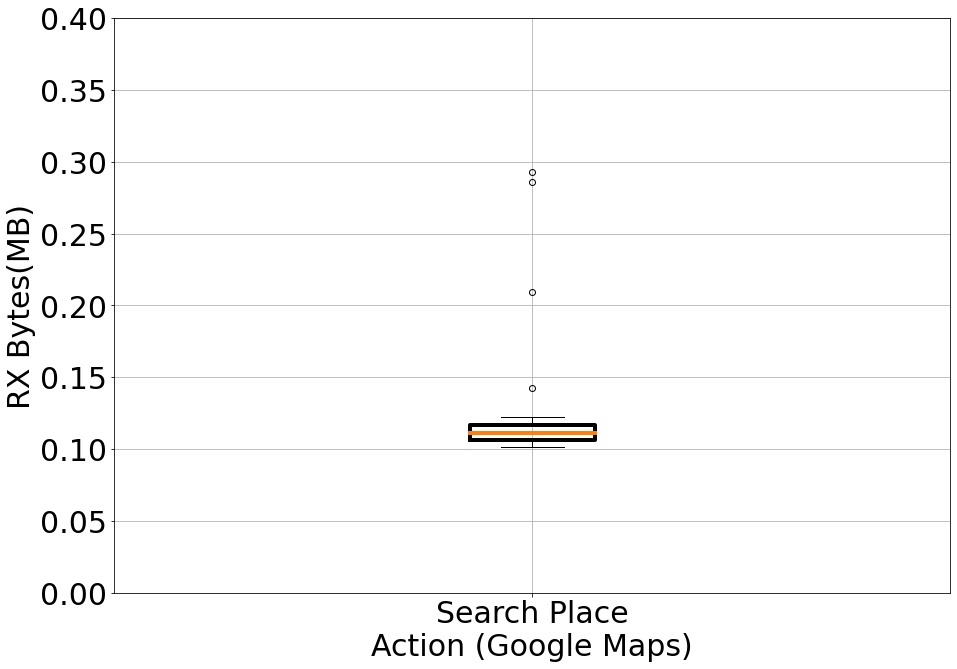

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'googlemaps'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Search Place']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google Maps)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 0.4])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'gmap_RX.pdf', bbox_inches='tight')

Median Value:  0.035754204
0.035754204 ['Search Place']


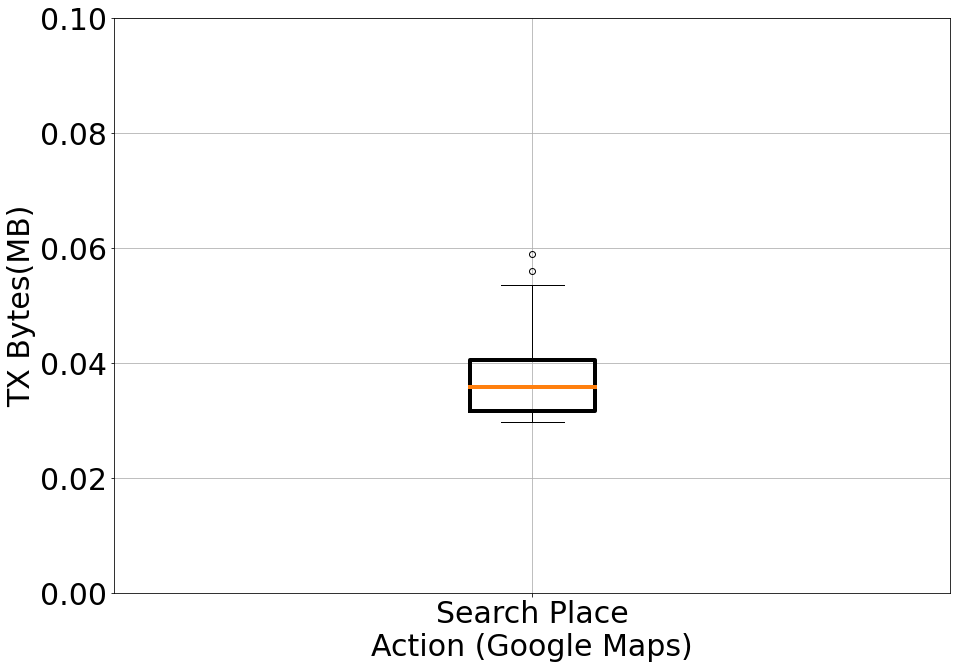

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'googlemaps'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Search Place']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google Maps)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.1])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'gmap_TX.pdf', bbox_inches='tight')

Median Value:  0.253435612
0.253435612 ['Open News']


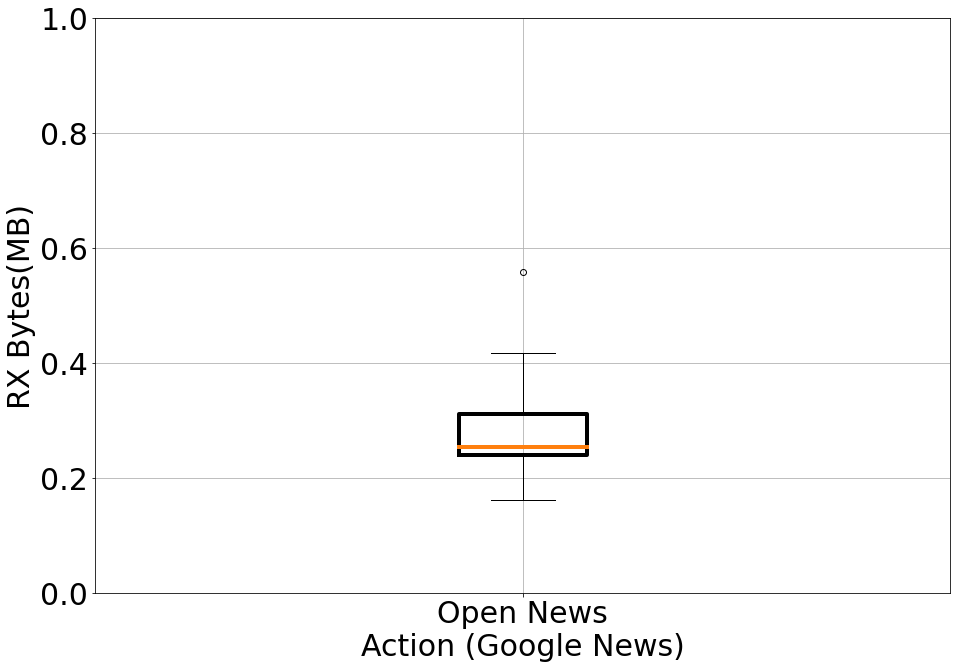

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'googlenews'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Open News']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google News)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 1])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'gnews_RX.pdf', bbox_inches='tight')

Median Value:  0.045018195999999996
0.045018195999999996 ['Open News']


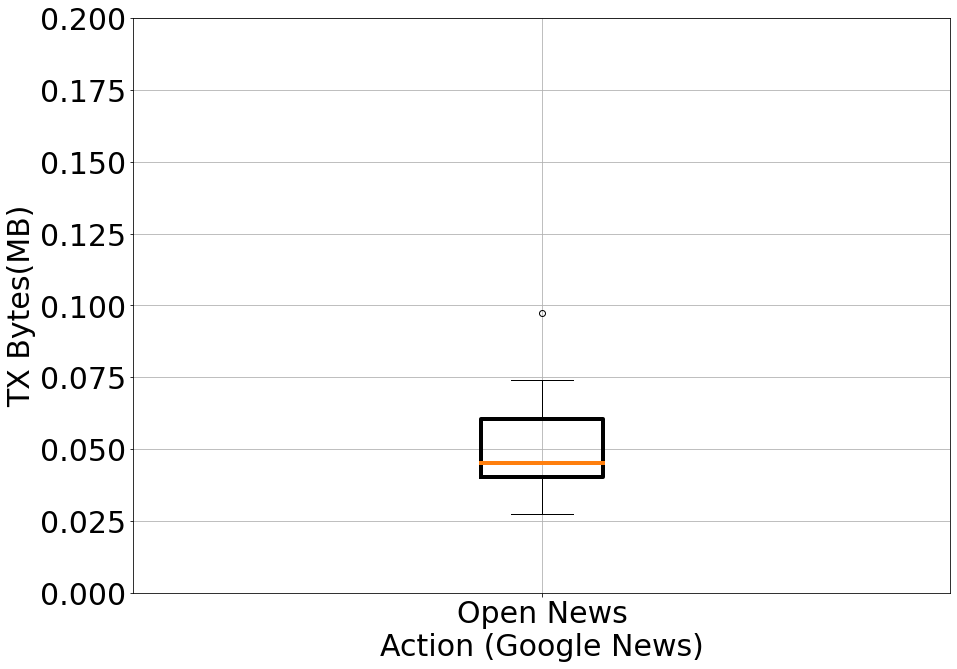

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'googlenews'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Open News']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google News)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.2])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'gnews_TX.pdf', bbox_inches='tight')

Median Value:  2.2984561919999997
Median Value:  2.105276108
2.2984561919999997 ['Play\n Video', 'Search\nVideo']


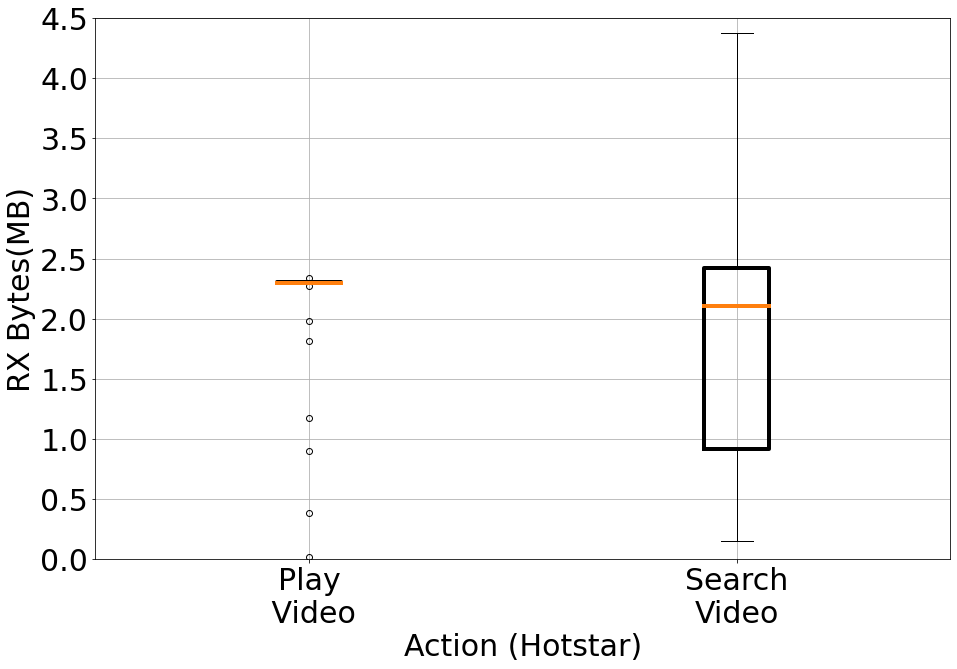

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'hotstar'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Play\n Video', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Hotstar)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 4.5])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'hotstar_RX.pdf', bbox_inches='tight')

Median Value:  0.0764718055
Median Value:  0.13156318649999998
0.0764718055 ['Play\n Video', 'Search\nVideo']


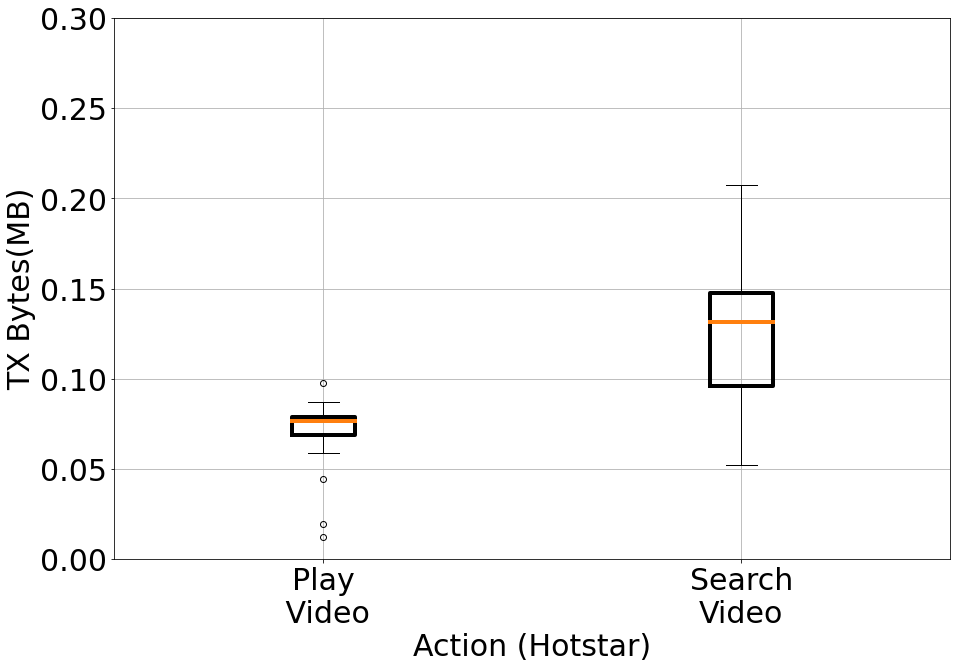

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'hotstar'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Play\n Video', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Hotstar)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.3])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'hotstar_TX.pdf', bbox_inches='tight')

Median Value:  0.24931716899999998
Median Value:  0.20092296599999998
Median Value:  0.251754284
0.24931716899999998 ['Check\nConnections', 'Profile\nPage', 'Search\nResults']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


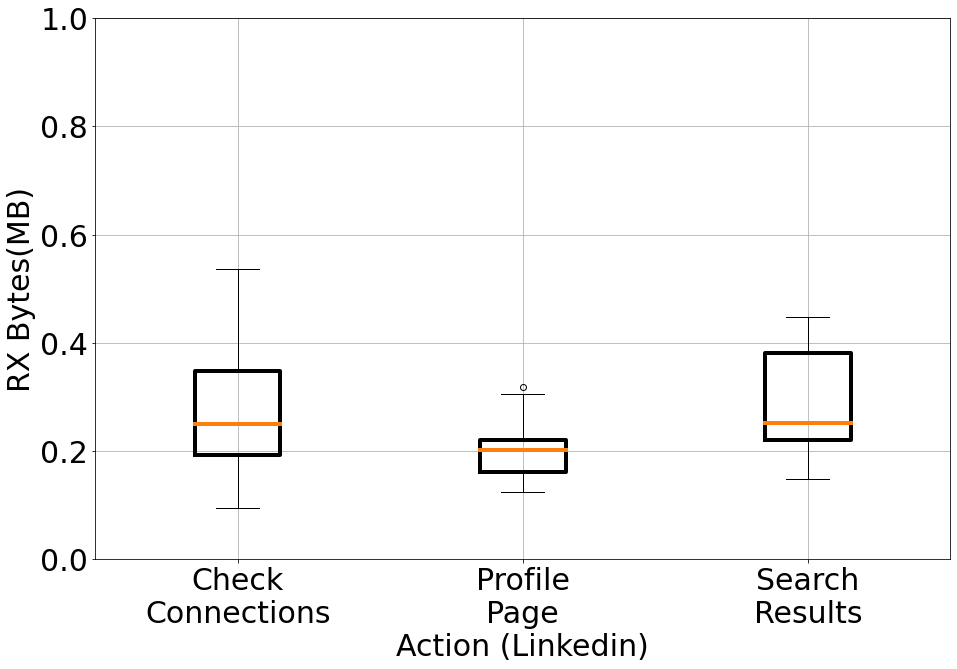

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'linkedin'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Check\nConnections', 'Profile\nPage', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Linkedin)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 1])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'linkedin_RX.pdf', bbox_inches='tight')

Median Value:  0.043278694000000006
Median Value:  0.0418424605
Median Value:  0.056765079499999996
0.043278694000000006 ['Check\nConnections', 'Profile\nPage', 'Search\nResults']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


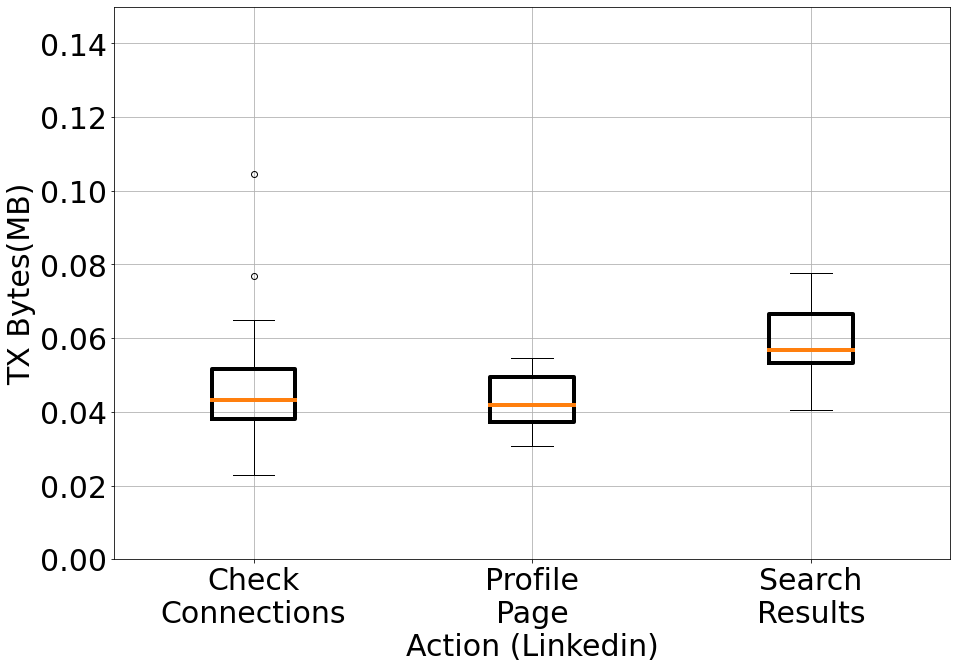

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'linkedin'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Check\nConnections', 'Profile\nPage', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Linkedin)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.15])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'linkedin_TX.pdf', bbox_inches='tight')

Median Value:  0.009739876
0.009739876 ['Message Sent']


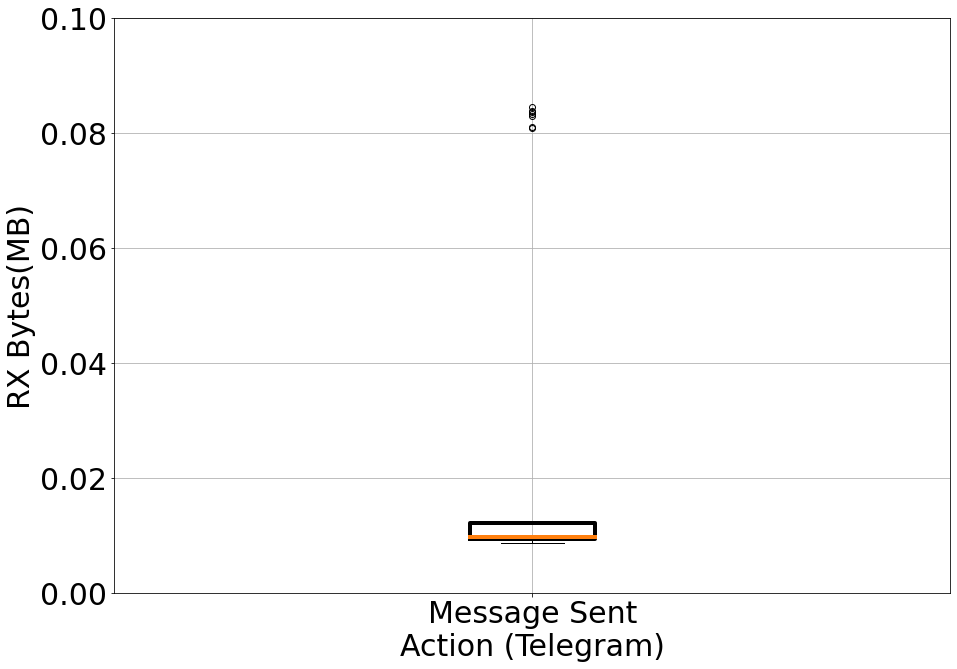

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'telegram'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Telegram)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 0.1])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'Telegram_RX.pdf', bbox_inches='tight')

Median Value:  0.015116691500000001
0.015116691500000001 ['Message Sent']


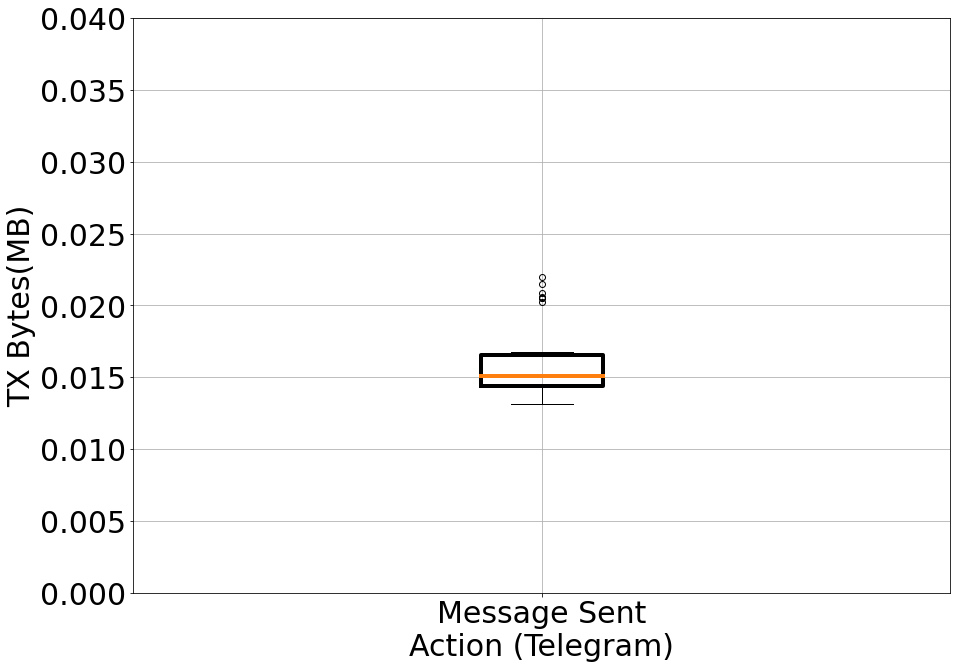

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'telegram'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Telegram)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.04])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'Telegram_TX.pdf', bbox_inches='tight')

Median Value:  0.0085997585
0.0085997585 ['Message Sent']


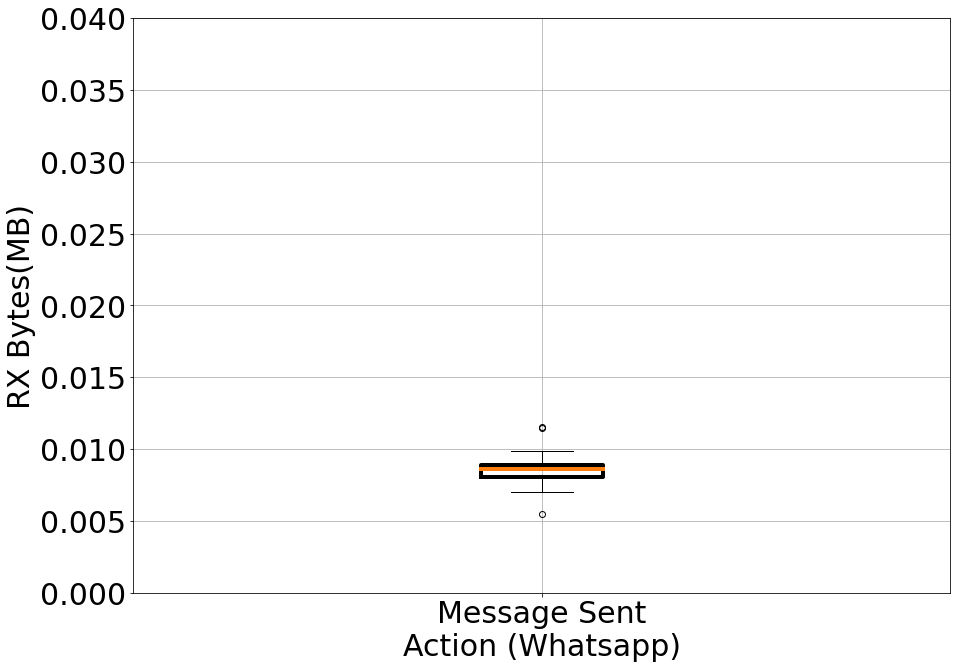

In [ ]:
rowvalues = df_rx[df_rx['APP'] == 'whatsapp'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_rx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_rx.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Whatsapp)')
plt.ylabel('RX Bytes(MB)')
plt.ylim([0, 0.04])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'Whatsapp_RX.pdf', bbox_inches='tight')

Median Value:  0.004535198000000001
0.004535198000000001 ['Message Sent']


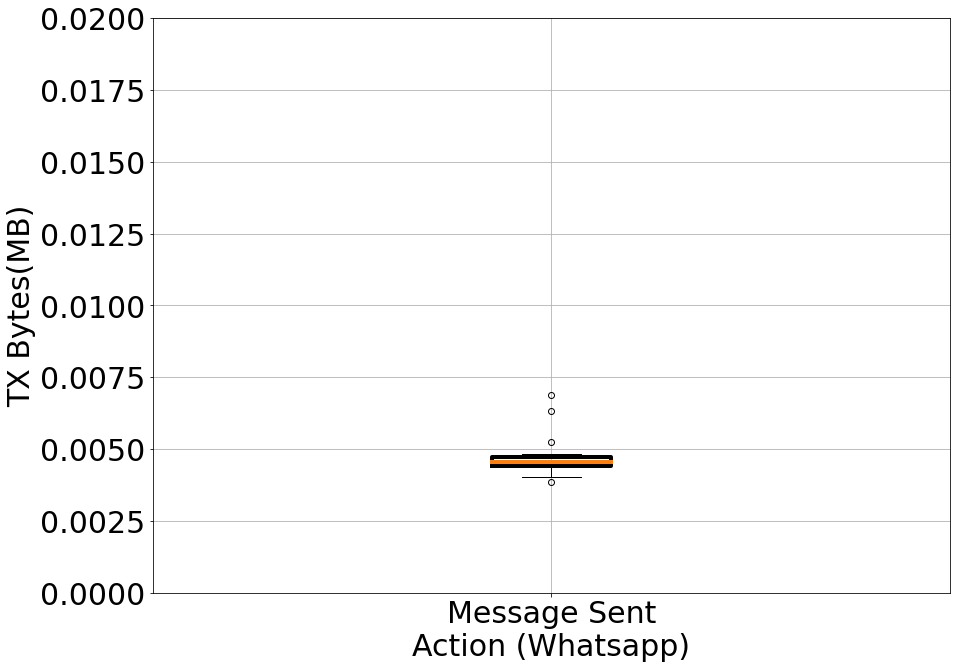

In [ ]:
rowvalues = df_tx[df_tx['APP'] == 'whatsapp'].index.values
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df_tx.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df_tx.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Whatsapp)')
plt.ylabel('TX Bytes(MB)')
plt.ylim([0, 0.02])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/Trx_Rcd_Analysis/Plots/'+'Whatsapp_TX.pdf', bbox_inches='tight')